In [436]:
conda install pytorch torchvision -c pytorch

UnboundLocalError: local variable 'child' referenced before assignment

In [4]:
## Multi Layer Perception Model
# Neural Probabilist Language Model

In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # For making figures
%matplotlib inline

In [6]:
words = open('names.txt', 'r').read().splitlines()

In [7]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [7]:
min(len(w) for w in words)

2

In [20]:
max(len(w) for w in words)

15

In [8]:
len(words)

32033

In [11]:
# Build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)


{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [198]:
#Build the dataset
block_size = 3 #Context length: How many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print('.'.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [199]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [64]:
C = torch.randn((27,2))

In [65]:
# Can index, but we will one hot encoding
F.one_hot(torch.tensor(5), num_classes=27).float() @ C #Changed to float to multiple float by float, instead of int to float
# First layer of neural net

tensor([-0.1307,  0.5318])

In [66]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [67]:
#Hidden Layer
W1 = torch.randn(6, 100) ## 3 * 2 = 6
b1 = torch.randn(100)

In [100]:
emb @ W1 + b1 # Transform 67,3,2 matrix to 67, 6 matric
 

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [70]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1).shape

torch.Size([32, 6])

In [71]:
### Use pytorch function unbind to go pass dimension issues
## It removes a tensor dimension
# Returns a tuple of all slices along a given dimension

torch.unbind(emb,1)

(tensor([[-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [-0.1307,  0.5318],
         [-1.1724, -0.2973],
         [-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [ 1.3248,  0.7121],
         [-1.5639,  0.3366],
         [ 0.6180, -1.0569],
         [-0.6075, -0.1880],
         [-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [-0.6341,  0.6897],
         [-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [ 0.6180, -1.0569],
         [-0.6371, -0.7139],
         [-0.6341,  0.6897],
         [ 0.0736,  0.7294],
         [-0.1307,  0.5318],
         [-1.5639,  0.3366],
         [-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [-0.6371, -0.7139],
         [ 1.3248,  0.7121],
         [-0.7027, -1.7982],
         [-0.8406,  1.6728]]),
 tensor([[-1.3484,  0.8617],
         [-1.3484,  0.8617],
         [-0

In [76]:
len(torch.unbind(emb,1))

3

In [80]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [82]:
torch.cat(torch.unbind(emb,1),1)

tensor([[-1.3484,  0.8617, -1.3484,  0.8617, -1.3484,  0.8617],
        [-1.3484,  0.8617, -1.3484,  0.8617, -0.1307,  0.5318],
        [-1.3484,  0.8617, -0.1307,  0.5318, -1.1724, -0.2973],
        [-0.1307,  0.5318, -1.1724, -0.2973, -1.1724, -0.2973],
        [-1.1724, -0.2973, -1.1724, -0.2973, -0.6341,  0.6897],
        [-1.3484,  0.8617, -1.3484,  0.8617, -1.3484,  0.8617],
        [-1.3484,  0.8617, -1.3484,  0.8617,  1.3248,  0.7121],
        [-1.3484,  0.8617,  1.3248,  0.7121, -1.5639,  0.3366],
        [ 1.3248,  0.7121, -1.5639,  0.3366,  0.6180, -1.0569],
        [-1.5639,  0.3366,  0.6180, -1.0569, -0.6075, -0.1880],
        [ 0.6180, -1.0569, -0.6075, -0.1880,  0.6180, -1.0569],
        [-0.6075, -0.1880,  0.6180, -1.0569, -0.6341,  0.6897],
        [-1.3484,  0.8617, -1.3484,  0.8617, -1.3484,  0.8617],
        [-1.3484,  0.8617, -1.3484,  0.8617, -0.6341,  0.6897],
        [-1.3484,  0.8617, -0.6341,  0.6897, -0.6075, -0.1880],
        [-0.6341,  0.6897, -0.6075, -0.1

In [101]:
emb.shape

torch.Size([32, 3, 2])

In [104]:
emb.view(32,6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [105]:
###Better, more efficient way
# View instead of cat and unbind

In [92]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [93]:
a.shape

torch.Size([18])

In [96]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [98]:
a.storage()
# 1D vector

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [106]:
 ### Example done, back to emb vector

In [111]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)
h
# Gives us the hidden states we are after
# To normalize, we use tanh so values between -1 and 1

tensor([[ 0.9464,  0.9888, -0.8444,  ..., -0.9983,  0.9895, -0.9999],
        [ 0.6845,  0.9992,  0.9680,  ..., -0.9999,  0.4952, -0.9999],
        [-0.0826,  0.9522, -0.8197,  ...,  0.6582,  0.9620, -0.8581],
        ...,
        [ 0.9999, -0.9996, -0.9569,  ..., -0.9979,  0.9971, -0.3281],
        [ 0.5985,  0.9952,  0.9997,  ..., -0.9989, -0.9909, -0.9985],
        [-0.4074, -0.2710, -0.8470,  ...,  0.8926,  0.9921,  0.9252]])

In [113]:
h.shape
## Hidden layer before final layer, softmax function

torch.Size([32, 100])

In [115]:
## Checking if broadcasting is doing what we like
(emb.view(-1,6) @ W1).shape

torch.Size([32, 100])

In [116]:
b1.shape

torch.Size([100])

In [ ]:
#32, 100
#1, 100
# Copy vertically, broadcasting align on the right
# then, element wise addition

In [119]:
#Final Layer, softmax
W2 = torch.randn(100, 27) ##27 characters, alphabet and '.'
b2 = torch.randn(27) #Biases

In [120]:
logits = h @ W2 + b2
#outputs

In [121]:
logits.shape

torch.Size([32, 27])

In [125]:
counts = logits.exp()
# Fig counts, then normalize to probability

In [135]:
prob = counts/ counts.sum(1, keepdim=True)

In [136]:
prob.shape

torch.Size([32, 27])

In [138]:
prob[0].sum() # If 1, it is normalize

tensor(1.0000)

In [140]:
### Next layer
## Y is entirty of next character, what we want to predict
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [142]:
#Iterator from 0 to 31
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [147]:
# Index into to the prob, grab each row by column Y
prob[torch.arange(32), Y]
# Values mean very unlikely, next is to train the network
# Goal is to get 1

tensor([2.1726e-10, 2.2492e-10, 2.6318e-10, 1.5227e-10, 7.5942e-04, 1.4836e-02,
        1.0919e-09, 3.7095e-07, 2.5753e-12, 1.1914e-13, 4.6626e-11, 3.0467e-12,
        3.4918e-07, 3.2107e-07, 2.5647e-11, 9.7220e-03, 2.4165e-08, 1.3107e-04,
        1.3665e-10, 7.1157e-07, 1.1370e-06, 1.1798e-05, 2.2434e-10, 3.8572e-09,
        1.4126e-02, 3.6856e-04, 8.0056e-08, 2.9442e-08, 2.6170e-09, 4.7073e-10,
        2.4437e-18, 6.9031e-11])

In [150]:
# Goal, minimize loss to predict correct character in the sequence
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(18.2050)

In [200]:
##### Now made in respectabe manner ####

In [209]:
#Build the entire dataset, instead of sub population
block_size = 3 #Context length: How many characters do we take to predict the next one?
X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print('.'.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [315]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [307]:
g = torch.Generator().manual_seed(2147483647) # Reproducibility

C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C,W1,b2,W2,b2]

In [308]:
sum(p.nelement() for p in parameters) 
#number of parameters in total


3408

In [309]:
for p in parameters:
    p.requires_grad = True

In [313]:
# lri = []
# lossi = []

for i in range(100000):
# Mini batch construct
    ix  = torch.randint(0,X.shape[0], (32,)) # Integers we want to optimize
    # Decreases loss much faster by indexing, gradient direction is good enough

#### Forward Pass
    emb = C[X[ix]] # (228146,3,2) # Embed ix to get the 32 by 3, instead of prior value
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32,27)
    # --- Classification
    # counts  = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # --- Cross Entropy, more efficient
    loss = F.cross_entropy(logits, Y[ix]) #Index into Y
    # ---But, don't use this in practice because doesn't create the 
    # ---tensors from above (counts, prob, loss)
    # Backward and forward pass made more efficient
     ## THIS WILL SHOW ERRORS
    # print(loss.item())

####Backward Pass
    for p  in parameters: 
        p.grad = None
    loss.backward()
    # Update, until at efficient level
    # lr = lrs[i] # lrs = Linear rates
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad # -0.1  is arbitrary, could be too slow or too fast
    #Track Stats
    # lri.append(lr) #Exponent lre[i] instead of learning rate (lre)
    # lossi.append(loss.item())

# print(loss.item())
#Reason why loss is so lower is because we are
#  overfitting 32 examples only with 3408 Parameters

#BUT, never get to 0 loss because the instances that start with 
# "..." will never have a consistent outcomes while others are 
# more likely 

# Issue that comes up is that the Loss function minizes very 
# slowly, so, in practice you do forward & backward passes 
# on batches of the data instead

In [314]:
### Evaluate the loss from the forward pass using Learning Rate Exponent
## Started loss at 2.7557

emb = C[X] # (32,3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32,27)
loss = F.cross_entropy(logits, Y)
loss

## Improved loss comes out to 2.3347 then 2.3147 and so on...

tensor(2.3147, grad_fn=<NllLossBackward0>)

In [316]:
# Need to split up dataset into 3 splits:
# Training - 80% of dataset
# Dev/Validation - 10% of dataset
# Test - 10% of dataset

In [416]:
#Build the entire dataset into 3 splits (train,dev,test)
def build_dataset(words):
    block_size = 3 #Context length: How many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print('.'.join(itos[i] for i in context), '----->', itos[ix])
            context = context[1:] + [ix] #crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random 
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182400, 3]) torch.Size([182400])
torch.Size([22962, 3]) torch.Size([22962])
torch.Size([22784, 3]) torch.Size([22784])


In [417]:
Xtr.shape, Ytr.shape

(torch.Size([182400, 3]), torch.Size([182400]))

In [418]:
g = torch.Generator().manual_seed(2147483647) # Reproducibility

#Incresae neurons as part of the scaling problem
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,300), generator=g) #Increase to 300 neurons from 100
b1 = torch.randn(300, generator=g) #Increase to 300 biases from 100

W2 = torch.randn((300,27), generator=g) #Increase to 300 inputs for final layer from 100
b2 = torch.randn(27, generator=g)

parameters = [C,W1,b2,W2,b2]

In [419]:
sum(p.nelement() for p in parameters) 
# After scaled, originally had 3408 parameters

17424

In [420]:
for p in parameters:
    p.requires_grad = True

In [364]:
# Not using after scaling up
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [421]:
lri = []
lossi = []
stepi = [] # tracks number of steps

In [427]:
for i in range(200000):
    ix  = torch.randint(0,Xtr.shape[0], (32,)) # Use X train, Xtr, shape

#### Forward Pass
    emb = C[Xtr[ix]] # Use X train set, Xtr
    h = torch.tanh(emb.view(-1,30) @ W1 + b1) 
    # Should not be hardcoding, but using it for testing & optimizing
    logits = h @ W2 + b2 # (32,27)
    loss = F.cross_entropy(logits, Ytr[ix]) #Index into Y train, Ytr, set
     ## THIS WILL SHOW ERRORS
    # print(loss.item())

####Backward Pass
    for p  in parameters: 
        p.grad = None
    loss.backward()
    # Update, until at efficient level
    # lr = lrs[i] # lrs = Linear rates
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad 
    
    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item()) 
    #Use log10 because we don't want hockey log look, 
    # want to squash loss
    


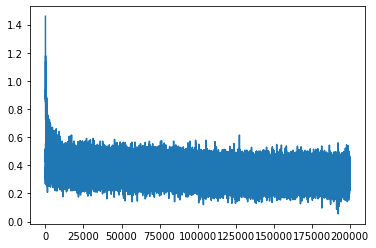

In [428]:
plt.plot(stepi, lossi) #NUMBER OF STEPS vs LOSS

#Shows how the loss function is being optimized, 
#but lot of thickness becuase of the mini batches,
#After running forward & back passes, graph becomes meaningless 

In [429]:
# Evaluating training set
emb = C[Xtr] # (32,3,2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) 
# Should not be hardcoding, but using it for testing & optimizing
logits = h @ W2 + b2 # (32,27)
loss = F.cross_entropy(logits, Ytr)
loss

#2.3710, after scaling we get 2.4967,
#  after optimizing and decrease Learning Rate we get  2.33428
# Bigger model, befoer underfitting, so now lower loss,
# Then we increased embedding vectors to 30 from 10 (where we hardcoded)
# and new results becomes 2.1021, BIG IMPROVEMENT

tensor(2.1021, grad_fn=<NllLossBackward0>)

In [430]:
# Evaluating dev/validation set
emb = C[Xdev] # (32,3,2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) 
# Should not be hardcoding, but using it for testing & optimizing
logits = h @ W2 + b2 # (32,27)
loss = F.cross_entropy(logits, Ydev)
loss


#2.3717 -> 2.3543 -> 2.1704 
# (After 100000 runs it stayed at this number)

tensor(2.1704, grad_fn=<NllLossBackward0>)

Big change in outcomes, since training and validation are starting to diverge we might be slowly beginning to overfit and have passed out Min(Loss)

In [358]:
# Since both training and validation are nearly equal, then we are
# not overfitting the data, but we are underfitting,
# Which means our network is very tiny so have the scale up

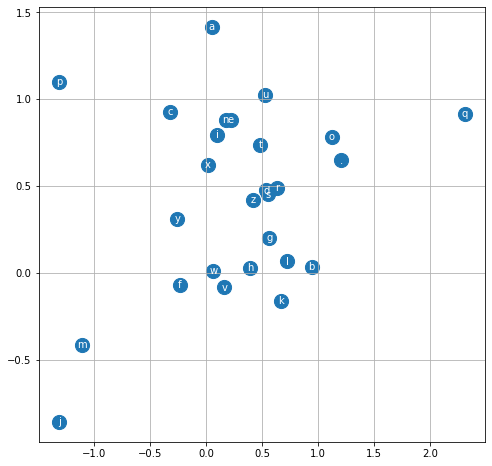

In [431]:
# After tests and optimization and increase embeddings
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200) #Embeddings trained by neural net
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center",va="center",color='white')
plt.grid('minor')

#Notice how vovels are treated similar, meaning they are interchangeable,
# but we need to increase embedding vectors in order to 
# rid of underfitting in model 


In [437]:
# Sample from our model! :)

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])] #(1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

mona.
kayah.
see.
madhryah.
rethan.
brerlee.
azeer.
seli.
jemi.
jen.
edelisson.
arleilyn.
hona.
cayshaberliah.
jess.
jah.
welle.
jetton.
kuya.
geder.


In [162]:
###OLD VERSION (BELOW) without MLP

In [26]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>
<S> i
i s
s a
a b
b e
e l
l l
l a
a <E>
<S> s
s o
o p
p h
h i
i a
a <E>
<S> c
c h
h a
a r
r l
l o
o t
t t
t e
e <E>
<S> m
m i
i a
a <E>
<S> a
a m
m e
e l
l i
i a
a <E>
<S> h
h a
a r
r p
p e
e r
r <E>
<S> e
e v
v e
e l
l y
y n
n <E>
<S> a
a b
b i
i g
g a
a i
i l
l <E>
<S> e
e m
m i
i l
l y
y <E>
<S> e
e l
l i
i z
z a
a b
b e
e t
t h
h <E>
<S> m
m i
i l
l a
a <E>
<S> e
e l
l l
l a
a <E>
<S> a
a v
v e
e r
r y
y <E>
<S> s
s o
o f
f i
i a
a <E>
<S> c
c a
a m
m i
i l
l a
a <E>
<S> a
a r
r i
i a
a <E>
<S> s
s c
c a
a r
r l
l e
e t
t t
t <E>
<S> v
v i
i c
c t
t o
o r
r i
i a
a <E>
<S> m
m a
a d
d i
i s
s o
o n
n <E>
<S> l
l u
u n
n a
a <E>
<S> g
g r
r a
a c
c e
e <E>
<S> c
c h
h l
l o
o e
e <E>
<S> p
p e
e n
n e
e l
l o
o p
p e
e <E>
<S> l
l a
a y
y l
l a
a <E>
<S> r
r i
i l
l e
e y
y <E>
<S> z
z o
o e
e y
y <E>
<S> n
n o
o r
r a
a <E>
<S> l
l i
i l
l y
y <E>
<S> e
e l
l e
e a
a n
n o
o r
r <E>
<S> h
h a
a n
n n
n a
a 

In [29]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [31]:
##2D Arry instead of Python Dictionary

import torch

In [36]:
a = torch.zeros((3,5), dtype = torch.int32) 
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [58]:
N = torch.zeros((27,27), dtype = torch.int32) 
##28 Words from out list

In [118]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [64]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        ##bigram = (ch1, ch2)
        ##b[bigram] = b.get(bigram, 0) + 1 
        ##print(ch1, ch2)


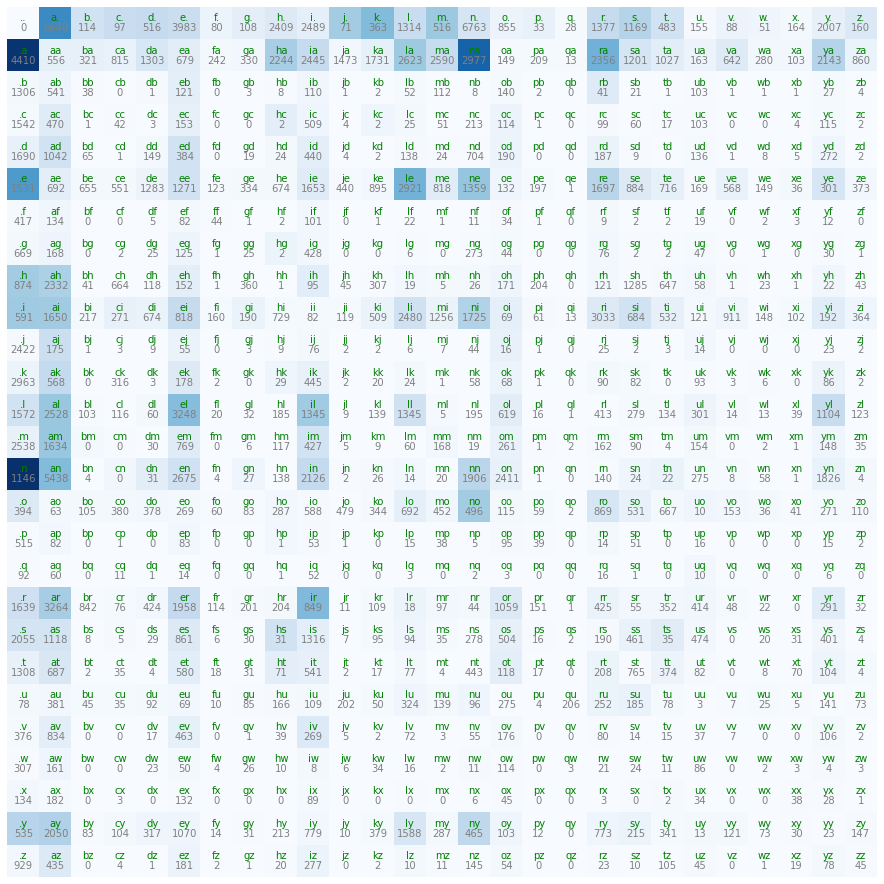

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(27):
    for j in range (27):
        chstr = itos[i] + itos[j]
        plt.text(i, j, chstr, ha="center", va="bottom", color="green")
        plt.text(i, j, N[i,j].item(), ha="center",va="top",color="gray")
plt.axis('off');


In [78]:
p = N[0].float()
##Create flots because you want to normalize the count
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [83]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
# itos[ix] = 
itos[ix]

'j'

In [68]:
##Generator object makes everything deterministic, 
# so we get same results on different terminals
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator = g)
p = p/p.sum()

In [69]:
p

tensor([0.6064, 0.3033, 0.0903])

In [72]:
##Returns probailites and we input integers
torch.multinomial(p, num_samples=100, replacement=True, generator=g)
##More we sample, closer we get to above distribution

tensor([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1,
        2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0,
        2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        1, 1, 2, 0])

In [102]:
P.sum(0, keepdim=True)
##Gives count of each dimension, in this case the letter

tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])

In [140]:
P = (N+1000).float()
# The +1 is the help smoothen out by adding a 1 to each count
P /= P.sum(1, keepdim=True)
# Want to sum by respective value, not by total count

In [146]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        #p = N[ix].float()
        #p = p / p.sum()
        
        #p = torch.ones(27)/27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


juwjdedianaqaz.
p.
cfqywecnn.
fjiinltoliogs.
gwzzuslanaauyanilevhajkdbdainrwibtldsnjyievylartezffvmumthyfodtumj.


In [142]:
# GOAL: Maximize likelihood of the data w.r.t model parameters
# (Statistical model)
# equivalent to maximizing the log likelihood 
# (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

In [150]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
# for w in ["andrew"]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        #log(a*b*c) = log(a) + log(b) + log(c)
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
#Proudct of print values should be as high as possible 
# for quality

print(f'{log_likelihood=}')
# Value is negative, so when all the probabilities are 1 then 
# the likelihhod is 0 and when it goes lower, the value will 
# become more negative

nll = -log_likelihood
print(f'{nll=}')
#nll = negative likelihood
print(f'{nll/n}')
# Normalized likelihood, the loss function
# Quality of the model, lower the better



.e: 0.0429 -3.1495
em: 0.0373 -3.2887
mm: 0.0347 -3.3605
ma: 0.1067 -2.2376
a.: 0.1255 -2.0756
.o: 0.0236 -3.7459
ol: 0.0463 -3.0717
li: 0.0850 -2.4655
iv: 0.0284 -3.5618
vi: 0.0646 -2.7392
ia: 0.0771 -2.5631
a.: 0.1255 -2.0756
.a: 0.0916 -2.3898
av: 0.0301 -3.5025
va: 0.0555 -2.8909
a.: 0.1255 -2.0756
log_likelihood=tensor(-45.1935)
nll=tensor(45.1935)
2.8245928287506104


In [149]:
# Neural network frameworks
# Single character as an input with weights (paramters)
# then make guesses to what follows
# and evaluate using loss function (prob is high)

In [163]:
# Create training set of bigrams

xs, ys = [],[]
#xs = inputs, ys = output

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)
        # N[ix1, ix2] += 1
        ##bigram = (ch1, ch2)
        ##b[bigram] = b.get(bigram, 0) + 1 
        ##print(ch1, ch2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
### note: always using lower case t for tensor 

. e
e m
m m
m a
a .


In [164]:
xs

tensor([ 0,  5, 13, 13,  1])

In [165]:
ys
# When input is 0, the desired output is 5 ( want a high prob)
#  & so on

tensor([ 5, 13, 13,  1,  0])

In [171]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
##one_hot takes an entire data type, so have to cast to float
# reason is becuase floats can flow into neural nets
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [172]:
xenc.shape

torch.Size([5, 27])

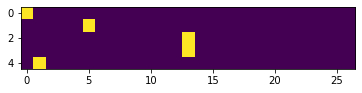

In [173]:
plt.imshow(xenc)

In [177]:
W = torch.randn((27,1))
#inital weight of array of normal distribution, most around 0, etc
xenc @ W
# @ is matrix mupltiplier in pytorch
# Output is 5,1 because multiplied 5,27 by 27,1

tensor([[-0.7383],
        [-0.4718],
        [-0.0207],
        [-0.0207],
        [ 0.1674]])

In [197]:
W = torch.randn((27,27))
#inital weight of array of normal distribution, most around 0, etc
xenc @ W
# @ is matrix mupltiplier in pytorch
# Output is 5,27

tensor([[-0.3927, -2.7581, -1.1226,  0.7492,  0.1276, -1.2432,  0.1402, -0.1441,
          1.2329,  1.2534, -1.2648, -0.1243,  1.1051, -0.9847,  0.6217,  0.7650,
          1.1879,  1.5569, -0.6376, -2.2822,  0.2359, -0.4616,  0.6637, -0.4440,
         -0.8685, -0.9295, -0.6528],
        [-0.7249, -0.1508,  0.7783,  1.1329,  0.0520, -1.8923, -0.5643,  1.5023,
          0.7790,  0.4910, -0.3021, -0.6845, -0.4678,  0.4664, -0.0577, -0.2188,
         -0.4889, -0.1413, -1.6386, -0.2348, -0.9896, -0.4747,  0.8452, -0.4090,
          0.2436, -1.4294,  1.9682],
        [-0.2877,  0.1820,  1.6441, -1.6163, -1.1265,  0.8318, -1.1621, -0.1075,
         -0.6483, -0.9627,  0.0545,  1.1122, -1.1074,  0.5232, -0.3095,  0.7419,
         -1.7848,  1.4629, -0.7633, -0.0855,  0.3731,  1.2025,  0.2013, -1.1661,
          0.8130, -0.3918,  1.1498],
        [-0.2877,  0.1820,  1.6441, -1.6163, -1.1265,  0.8318, -1.1621, -0.1075,
         -0.6483, -0.9627,  0.0545,  1.1122, -1.1074,  0.5232, -0.3095,  0.7419

In [198]:
(xenc @ W).shape
# Dot product

torch.Size([5, 27])

In [201]:
(xenc @ W)[3,13]
##Wx + b, note no b (bias) but now we have 27 neurons
# Goal is to get a count for each interesction, then to normalize
# We need counts, but the dot product is giving us log(counts)
# so, we need to exponentiate them

tensor(0.5232)

In [205]:
counts = (xenc @ W).exp()
# Counts are always positive numbers, based on setting of W
probs = counts / counts.sum(1, keepdims=True)
# Probability are the counts normalized
# 1 = along the 1st dimension, keepdims = keep dimensions
probs

tensor([[0.0185, 0.0017, 0.0089, 0.0578, 0.0310, 0.0079, 0.0314, 0.0237, 0.0938,
         0.0957, 0.0077, 0.0241, 0.0825, 0.0102, 0.0509, 0.0587, 0.0896, 0.1296,
         0.0144, 0.0028, 0.0346, 0.0172, 0.0531, 0.0175, 0.0115, 0.0108, 0.0142],
        [0.0131, 0.0232, 0.0588, 0.0838, 0.0284, 0.0041, 0.0154, 0.1213, 0.0588,
         0.0441, 0.0200, 0.0136, 0.0169, 0.0430, 0.0255, 0.0217, 0.0166, 0.0234,
         0.0052, 0.0213, 0.0100, 0.0168, 0.0629, 0.0179, 0.0344, 0.0065, 0.1932],
        [0.0191, 0.0305, 0.1318, 0.0051, 0.0083, 0.0585, 0.0080, 0.0229, 0.0133,
         0.0097, 0.0269, 0.0774, 0.0084, 0.0430, 0.0187, 0.0535, 0.0043, 0.1099,
         0.0119, 0.0234, 0.0370, 0.0847, 0.0311, 0.0079, 0.0574, 0.0172, 0.0804],
        [0.0191, 0.0305, 0.1318, 0.0051, 0.0083, 0.0585, 0.0080, 0.0229, 0.0133,
         0.0097, 0.0269, 0.0774, 0.0084, 0.0430, 0.0187, 0.0535, 0.0043, 0.1099,
         0.0119, 0.0234, 0.0370, 0.0847, 0.0311, 0.0079, 0.0574, 0.0172, 0.0804],
        [0.0337, 0.0078,

In [206]:
probs[0].sum()
# rolls up to 1 because they are normalized

tensor(1.)

In [210]:
probs[0]
# Distribution of probabilites, this 0 is the "." from above
# where we created the training set

tensor([0.0185, 0.0017, 0.0089, 0.0578, 0.0310, 0.0079, 0.0314, 0.0237, 0.0938,
        0.0957, 0.0077, 0.0241, 0.0825, 0.0102, 0.0509, 0.0587, 0.0896, 0.1296,
        0.0144, 0.0028, 0.0346, 0.0172, 0.0531, 0.0175, 0.0115, 0.0108, 0.0142])

In [211]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the nueral net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual character):', y)
    p = probs[i,y]
    print('probability assigned by the net to the correct character', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood', nll.item())
    nlls[i] = nll

print('========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


--------
bigram example 1: .e (indexes 0,5)
input to the nueral net: 0
output probabilities from the neural net: tensor([0.0185, 0.0017, 0.0089, 0.0578, 0.0310, 0.0079, 0.0314, 0.0237, 0.0938,
        0.0957, 0.0077, 0.0241, 0.0825, 0.0102, 0.0509, 0.0587, 0.0896, 0.1296,
        0.0144, 0.0028, 0.0346, 0.0172, 0.0531, 0.0175, 0.0115, 0.0108, 0.0142])
label (actual character): 5
probability assigned by the net to the correct character 0.007882777601480484
log likelihood: -4.843074798583984
negative log likelihood 4.843074798583984
--------
bigram example 2: em (indexes 5,13)
input to the nueral net: 5
output probabilities from the neural net: tensor([0.0131, 0.0232, 0.0588, 0.0838, 0.0284, 0.0041, 0.0154, 0.1213, 0.0588,
        0.0441, 0.0200, 0.0136, 0.0169, 0.0430, 0.0255, 0.0217, 0.0166, 0.0234,
        0.0052, 0.0213, 0.0100, 0.0168, 0.0629, 0.0179, 0.0344, 0.0065, 0.1932])
label (actual character): 13
probability assigned by the net to the correct character 0.043037448078393936
l

In [212]:
 ## We are guessing and checking parameters, not the way you 
 ## optimize a neural network
 ## You have to start with a random guess, then you have minimize
 ## the loss with respect to the w, gradients

# You have to optimize the gradient

In [213]:
#---------- !!! OPTIMIZATION !!! ---------#

In [214]:
xs ##Inputs

tensor([ 0,  5, 13, 13,  1])

In [216]:
ys ##Outputs

tensor([ 5, 13, 13,  1,  0])

In [244]:
# random initialize 27 neurons' weights. 
# Each neuron received 27 inputs

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)
# True so pytorch knows we want to populate them

In [260]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() 
#inputs to the network: one-hot encoding
logits = xenc @ W #predicts log-counts
counts = logits.exp()
probs = counts / counts.sum(1,keepdims=True)

In [246]:
probs.sum()

tensor(5.0000, grad_fn=<SumBackward0>)

In [247]:
probs.shape

torch.Size([5, 27])

In [248]:
prob[0,5],prob[1,13],prob[2,13],prob[3,1],probs[4,0]
## List them out as a tuple

(tensor(0.0079),
 tensor(0.0430),
 tensor(0.0430),
 tensor(0.0305),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [261]:
##Continuation of forward pass

loss = - probs[torch.arange(5),ys].log().mean()
loss
## Pass in all the integers (above) into vectors
# Probability of the correct next character

tensor(3.7291, grad_fn=<NegBackward0>)

In [250]:
## Backward pass
# 1st have to reset the gradients
W.grad = None #set gradient to zerio
loss.backward() 
# Fills in gradients of the intermediants, back to parameters W

In [254]:
W.grad.shape

torch.Size([27, 27])

In [252]:
W.shape

torch.Size([27, 27])

In [257]:
## Can use gradients to determine weights of neural network
W.data += -0.1 * W.grad

In [262]:
print(loss.item())
## Will be lower each time you run forward pass
# This is called gradient descent

3.7291419506073


In [266]:
# ----------- !!! FINAL OPTIMIZATIO N !!! ----------- #

words[:1]

['emma']

In [302]:
# create the dataset
xs, ys = [],[]
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    num = xs.nelement()
    print('number of examples:', num)

#initalize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad=True)

number of examples: 5


In [304]:
# gradient descent
for k in range(100):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() #input the network
    logits = xenc @ W #predict log-counts
    counts = logits.exp() #counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() #Spring force that pushes loss to 0
    print(loss.item())

    #backward pass
    W.grad = None # sets gradient to zero
    loss.backward()

    #update
    W.data += -1 * W.grad

0.35038939118385315
0.3496376574039459
0.34890392422676086
0.3481876850128174
0.34748831391334534
0.3468053936958313
0.346138060092926
0.34548601508140564
0.3448486030101776
0.34422552585601807
0.34361618757247925
0.34302014112472534
0.3424370586872101
0.34186649322509766
0.34130802750587463
0.3407612442970276
0.34022581577301025
0.33970150351524353
0.3391878604888916
0.338684618473053
0.3381914496421814
0.3377079665660858
0.3372340798377991
0.3367694020271301
0.3363136351108551
0.3358667194843292
0.3354281187057495
0.33499783277511597
0.33457547426223755
0.33416101336479187
0.3337540626525879
0.33335456252098083
0.33296215534210205
0.33257684111595154
0.33219829201698303
0.3318263292312622
0.3314608931541443
0.3311017155647278
0.33074870705604553
0.3304017186164856
0.33006057143211365
0.329725056886673
0.32939520478248596
0.3290705978870392
0.32875147461891174
0.328437477350235
0.3281284272670746
0.3278243839740753
0.32752513885498047
0.3272305727005005
0.3269405961036682
0.3266551494

In [310]:
# Sample from neural network 
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # BEFORE:
        # p = P[ix]
        # NOW:
        xenc = F.one_hot(xs, num_classes=27).float() #input the network
        logits = xenc @ W #predict log-counts
        counts = logits.exp() #counts, equivalent to N
        probs = counts / counts.sum(1, keepdims=True)
    
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
print(''.join(out))


coreayaezocfkyjjabdiwejfmoiimwyfinwagaasnhsvfihouszxhddgosfmptpagicz.
